In [2]:
import numpy as np
import pandas
import pandas as pd


from ISLP import load_data
from sympy.stats import Logistic


# Get Data


In [3]:
Data = load_data("Weekly")

Data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


# Graphs and statistics

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


## Histograms

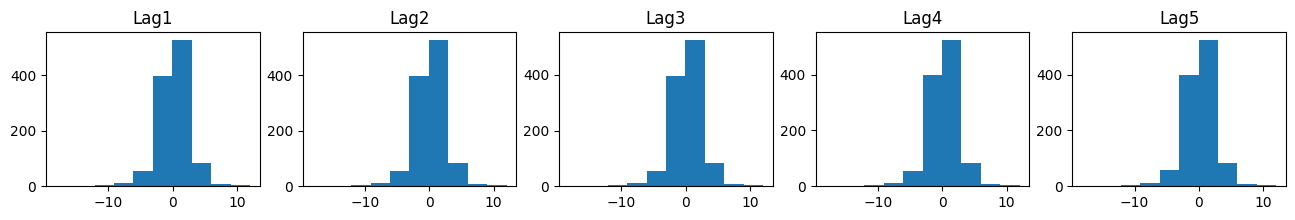

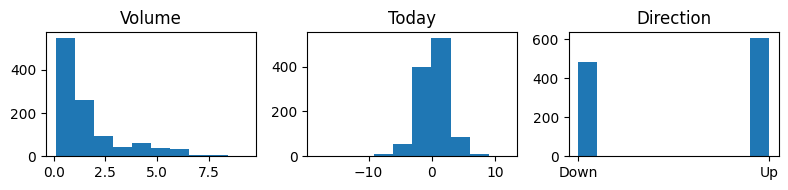

In [5]:
lag = ["Lag1", "Lag2", "Lag3","Lag4","Lag5"]
up = plt.subplots(1,5, figsize=(16,2))[1]

for idx, l in enumerate(lag):
    ax = up[idx]
    ax.set_title(l)
    ax.hist(Data[l], label=l)


down = plt.subplots(1,3, figsize=(8,2))[1]
ax = down[0]
ax.set_title("Volume")
ax.hist(Data["Volume"])

ax = down[1]
ax.set_title("Today")
ax.hist(Data["Today"])

ax = down[2]
ax.set_title("Direction")
ax.hist(Data["Direction"])

plt.tight_layout()
plt.show()

## Scatter Matrix

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Lag1', ylabel='Year'>,
        <Axes: xlabel='Lag2', ylabel='Year'>,
        <Axes: xlabel='Lag3', ylabel='Year'>,
        <Axes: xlabel='Lag4', ylabel='Year'>,
        <Axes: xlabel='Lag5', ylabel='Year'>,
        <Axes: xlabel='Volume', ylabel='Year'>,
        <Axes: xlabel='Today', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Lag1'>,
        <Axes: xlabel='Lag1', ylabel='Lag1'>,
        <Axes: xlabel='Lag2', ylabel='Lag1'>,
        <Axes: xlabel='Lag3', ylabel='Lag1'>,
        <Axes: xlabel='Lag4', ylabel='Lag1'>,
        <Axes: xlabel='Lag5', ylabel='Lag1'>,
        <Axes: xlabel='Volume', ylabel='Lag1'>,
        <Axes: xlabel='Today', ylabel='Lag1'>],
       [<Axes: xlabel='Year', ylabel='Lag2'>,
        <Axes: xlabel='Lag1', ylabel='Lag2'>,
        <Axes: xlabel='Lag2', ylabel='Lag2'>,
        <Axes: xlabel='Lag3', ylabel='Lag2'>,
        <Axes: xlabel='Lag4', ylabel='Lag2'>,
        <Axes: xlabel='Lag

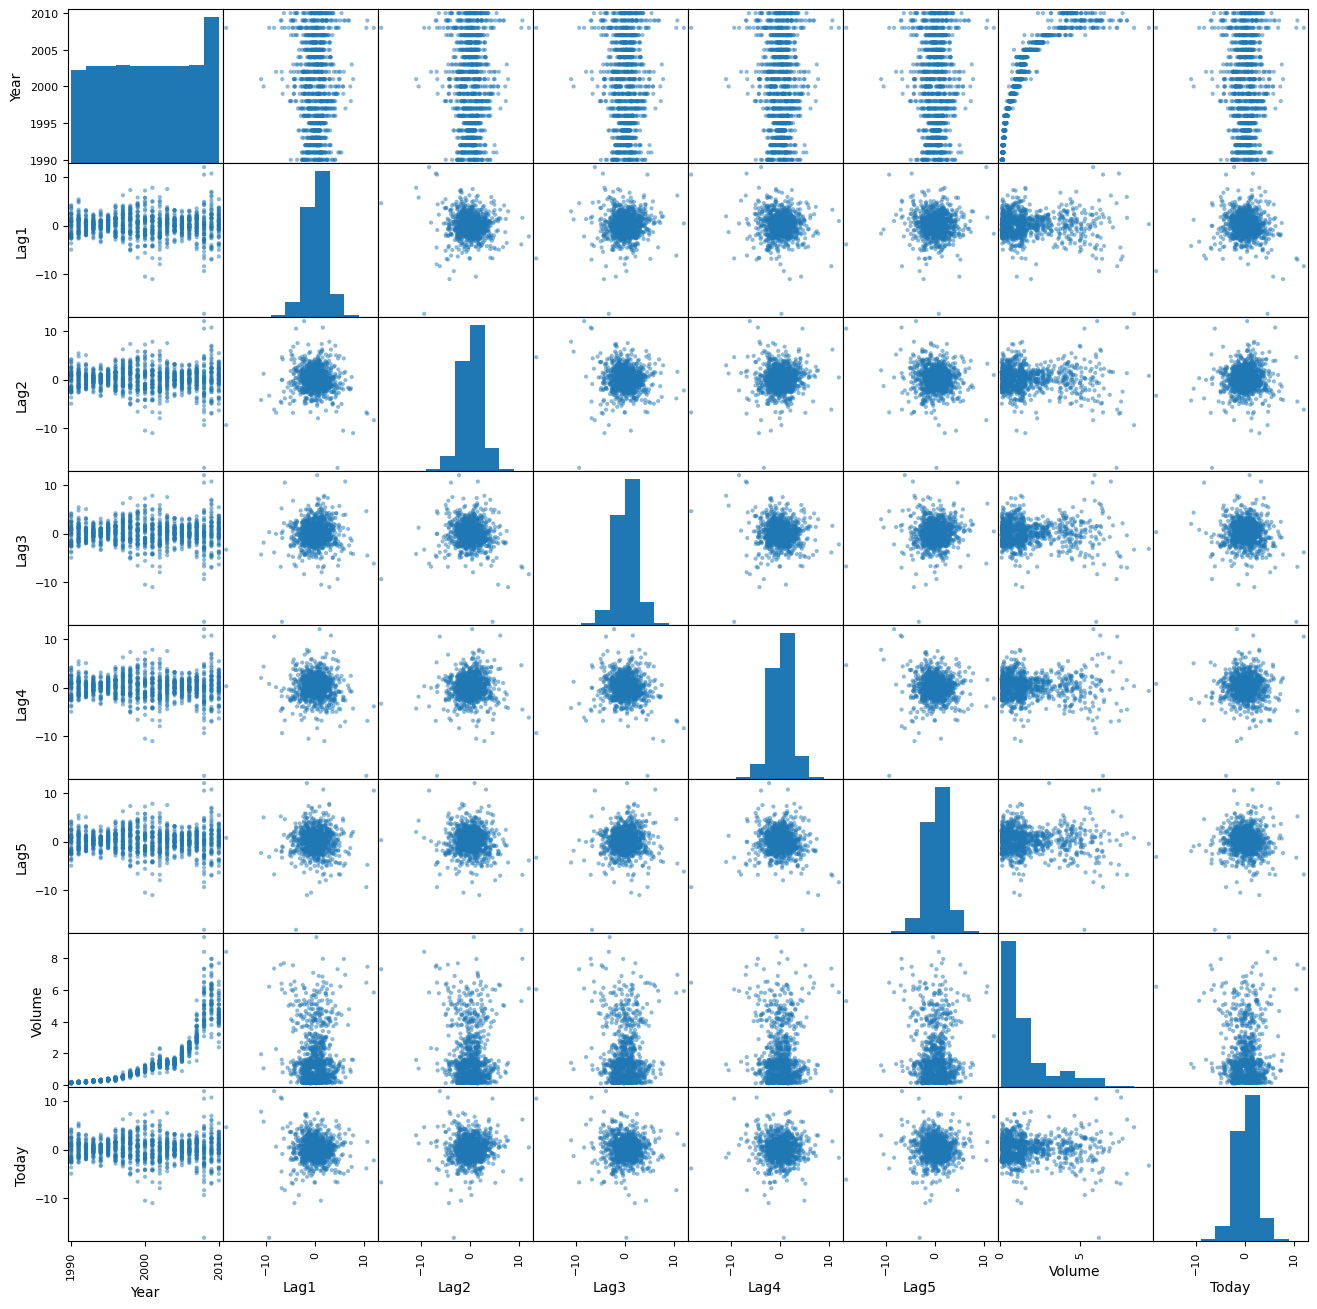

In [6]:
scatter_matrix(Data, figsize=(16,16))

## Correlation

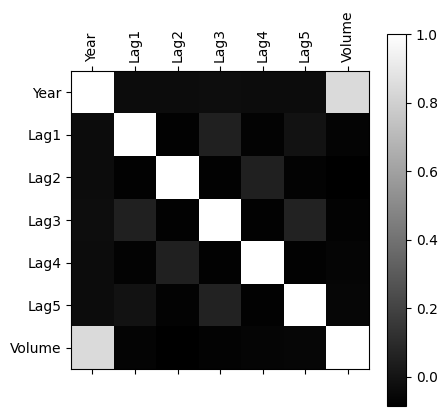

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000


In [7]:
names = Data.columns[:7]
corr_mtx = (Data[names]).corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.show()

corr_mtx

# Logistic Regression


## Imports

In [8]:
import statsmodels.api as sm
from ISLP.models import summarize

## Mode Training
We want to predict if Up

In [9]:
pred_names = ["Volume", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]

X = Data[pred_names]
y = np.array([1 if x=='Up' else 0 for x in Data['Direction']]) #Map Y to 0 and 1


model = sm.GLM(y, X,
             family=sm.families.Binomial())

results = model.fit()
summarize(results)


,coef,std err,z,P>|z|
Volume,0.0569,0.027,2.125,0.034
Lag1,-0.0327,0.026,-1.250,0.211
Lag2,0.0682,0.027,2.556,0.011
Lag3,-0.0081,0.026,-0.306,0.759
Lag4,-0.0194,0.026,-0.740,0.459
Lag5,-0.0069,0.026,-0.261,0.794


### Statistical Significant Predictors
Basing on Z value and p-value.
- Lag2
- Volume

In [10]:
from ISLP import confusion_table

pred = results.predict()

lables = ["Up" if p>0.5 else "Down" for p in pred]
confusion_table(lables, Data['Direction'])
#   TP  FP
#   FN  TN



Truth,Down,Up
Predicted,,
Down,172,178
Up,312,427


# Train/valiation split, testing the performence of different models (d)
From now on using scikit learn Models

## Imports

In [11]:
# statistic
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score, accuracy_score



from sklearn.linear_model import LinearRegression

## Function for Calculating Metrics

In [12]:
def metrics(preds:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, preds)
    roc_area = roc_auc_score(lables, preds)
    accuracy = accuracy_score(lables, preds)

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}




## Data Preparation

In [13]:
train = Data[Data['Year']<=2008]
val = Data[Data['Year']>2008]


x_train, x_val = np.array(train["Lag2"].values).reshape(-1, 1) , np.array(val["Lag2"].values).reshape(-1, 1)
y_train, y_val = np.array([ 1 if d=="Up" else 0 for d in train["Direction"]]), np.array([ 1 if d=="Up" else 0 for d in val["Direction"]])


### Logistic Regression

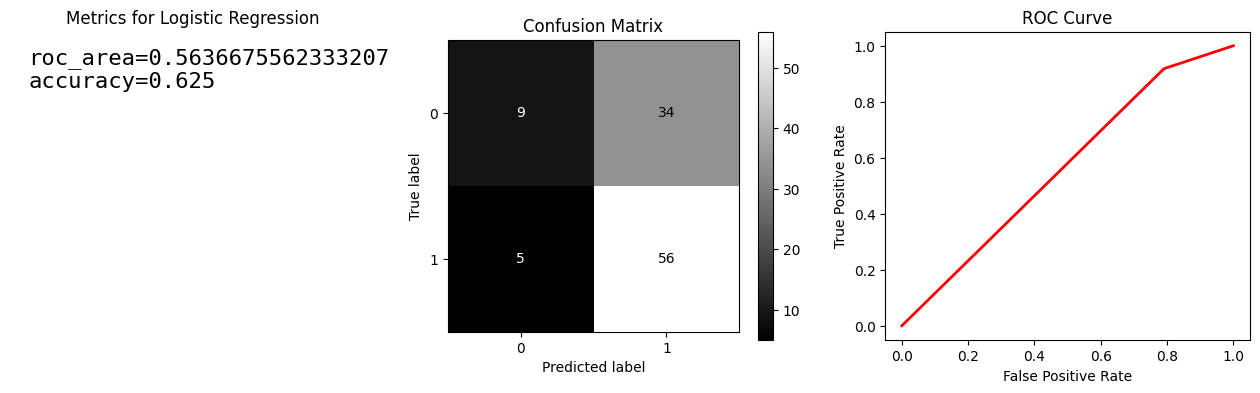

In [14]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

logistic_m = metrics(y_pred, y_val, "Logistic Regression")

## LDA

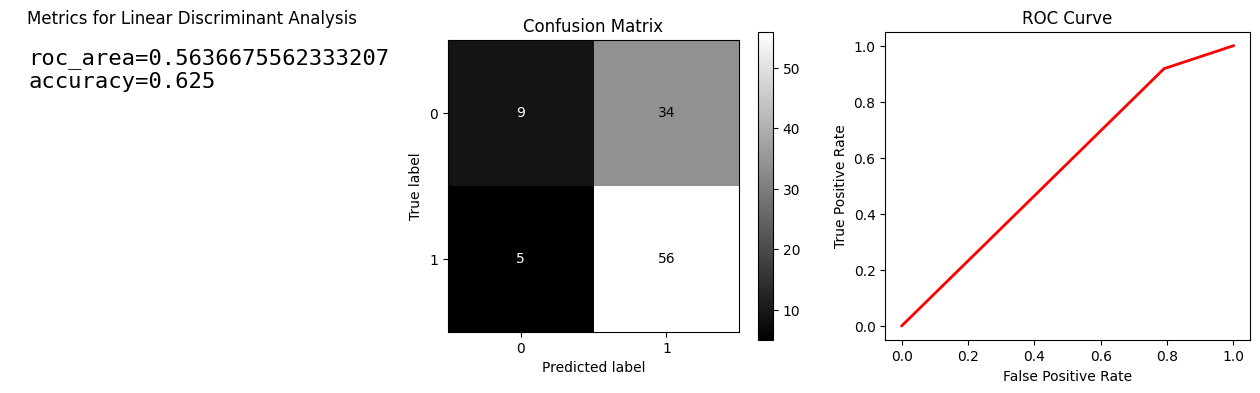

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

LDA_m = metrics(y_pred, y_val, "Linear Discriminant Analysis")

## QDA

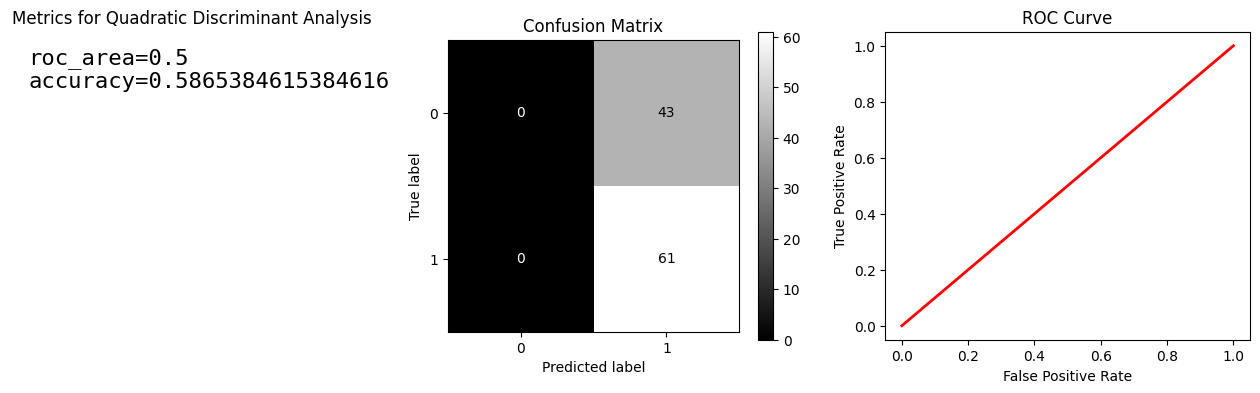

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

QDA_m = metrics(y_pred, y_val, "Quadratic Discriminant Analysis")

## K-Nearest Neighbours

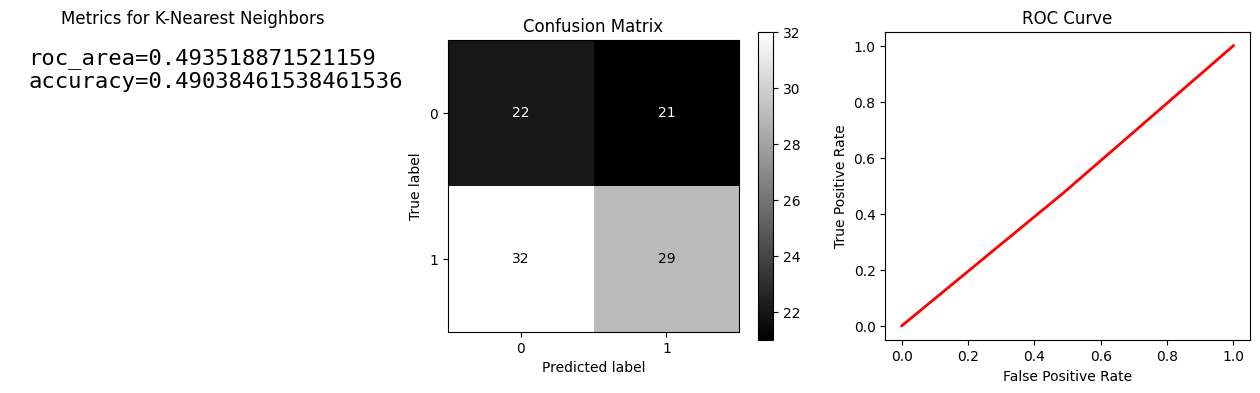

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
KNN_m = metrics(y_pred, y_val, "K-Nearest Neighbors")

## Naive Bayes

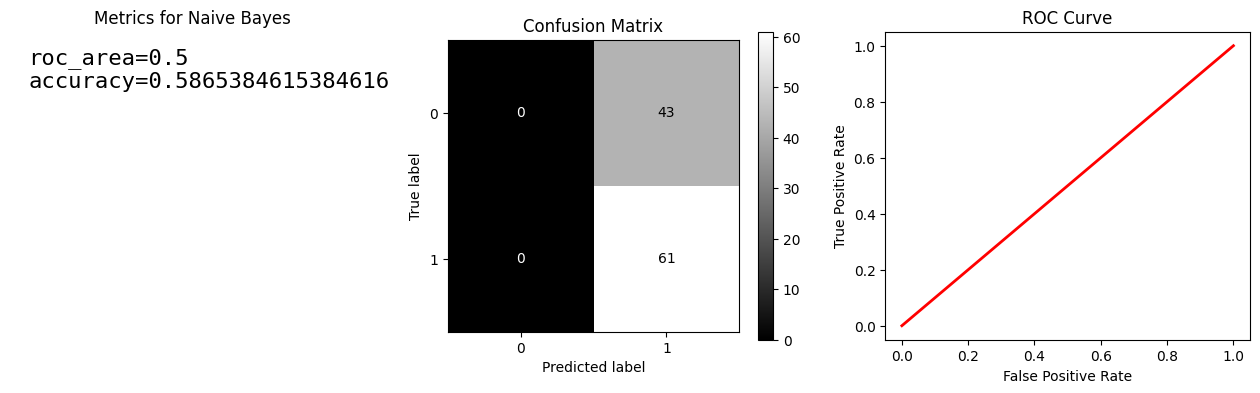

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

NB_m = metrics(y_pred, y_val, "Naive Bayes")

# Experiments

### KNN with diferrent predictors

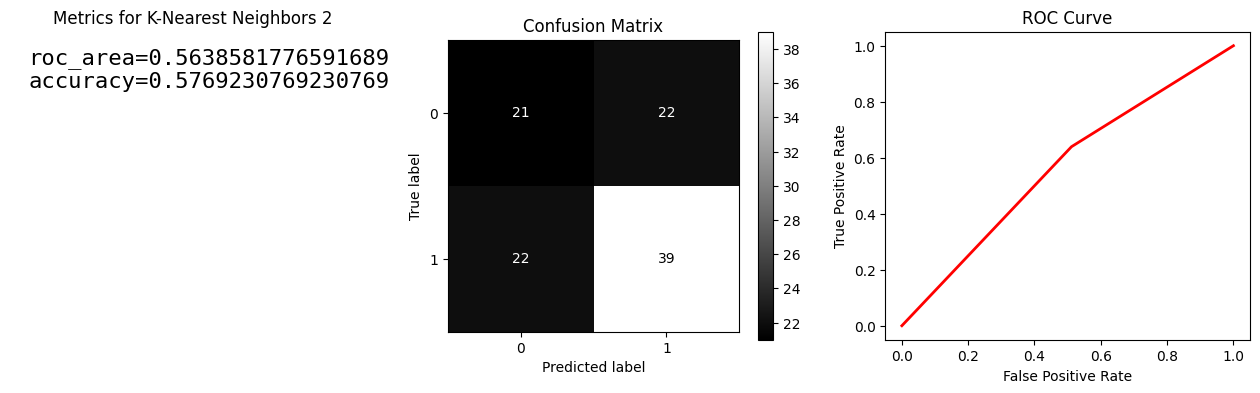

In [70]:
x_train = []

for xt in train.values:
    new_x = xt[[2,5,6]]
    x_train.append(new_x)

x_val=[]

for xt in val.values:
    new_x = xt[[1,2,6]]
    x_val.append(new_x)


model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

KNN2_m = metrics(y_pred, y_val, "K-Nearest Neighbors 2")

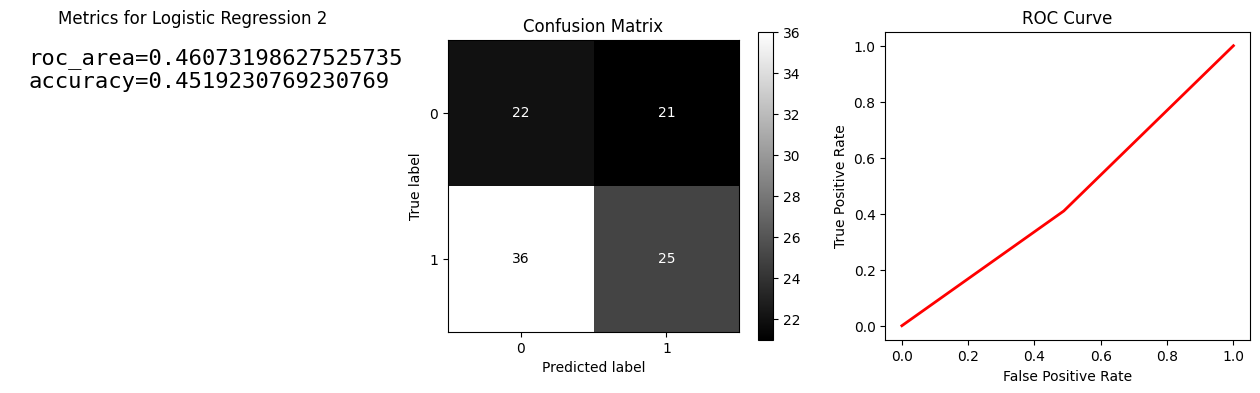

In [68]:
## Logistic regression for the same

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

logistic_m2 = metrics(y_pred, y_val, "Logistic Regression 2")